## Business Problem

Kejahatan di wilayah metropolitan utama, seperti London, terjadi dalam pola yang berbeda. Data ini mencakup jumlah laporan kriminal berdasarkan bulan, wilayah LSOA, dan kategori mayor/minor dari Jan 2008-Des 2016. Jadi dalam kasus ini mari kita mencari informasi tersebut dan nanti kita akan merangkumnya pada kesimpulan nanti

## Import Library

Pertama-tama mari kita import beberapa library yang akan kita gunakan pada bisnis case ini

In [1]:
import numpy as np  
import pandas as pd 
from PIL import Image 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
from wordcloud import WordCloud, STOPWORDS
import folium
from folium import plugins
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

## Data Pre-Processing

Setelah kita mari kita membaca data kita

In [2]:
df = pd.read_csv("dataset/london_crime.csv")
df.head(5)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


Setelah itu mari kita mencari informasi setiap kolom pada data kita

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


- lsoa_code: kode untuk Area Output Super Bawah di London Raya.
- borough: Nama umum untuk borough London.
- major_category: Kategorisasi kejahatan tingkat tinggi
- minor_category: Kategorisasi kejahatan tingkat rendah dalam kategori utama.
- nilai: jumlah kejahatan kategoris yang dilaporkan setiap bulan di wilayah tertentu
- tahun: Tahun penghitungan yang dilaporkan, 2008-2016
- bulan: Bulan jumlah yang dilaporkan, 1-12

In [4]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [5]:
df.shape

(13490604, 7)

Lalu kita ingin mengecek apakah data kita terdapat missing value

In [6]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Setelah itu mari kita ubah tipe data kita menjadi kategori

In [40]:
df['major_category'] = df['major_category'].astype('category')
df['minor_category'] = df['minor_category'].astype('category')

Mari kita mengecek kembali data kita apakah sudah berubah atau belum

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype   
---  ------          -----   
 0   lsoa_code       object  
 1   borough         object  
 2   major_category  category
 3   minor_category  category
 4   value           int64   
 5   year            int64   
 6   month           int64   
dtypes: category(2), int64(3), object(2)
memory usage: 540.4+ MB


Jika kita lihat dengan diubahnya menjadi kategorikal akan membuat memory usage kita berkurang

In [9]:
df_clean = df.drop('lsoa_code',axis=1)
df_clean.head()

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


In [10]:
df_index = df_clean.set_index("borough")

In [11]:
df_clean

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,Croydon,Robbery,Business Property,0,2011,5


## Data Exploration

In [12]:
df_clean.head()

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


Kita akan melihat data unik setiap major_category dan minor_category

In [13]:
major_cat = df_clean.groupby('major_category')['minor_category'].unique().reset_index()
major_cat = major_cat.explode('minor_category')
major_cat

,major_category,minor_category
0,Burglary,Burglary in Other Buildings
0,Burglary,Burglary in a Dwelling
1,Criminal Damage,Criminal Damage To Other Building
1,Criminal Damage,Criminal Damage To Dwelling
1,Criminal Damage,Criminal Damage To Motor Vehicle
1,Criminal Damage,Other Criminal Damage
2,Drugs,Possession Of Drugs
2,Drugs,Drug Trafficking
2,Drugs,Other Drugs
3,Fraud or Forgery,Counted per Victim


Lalu coba kita lakukan aggregasi nilai kejahatan yang di laporkan berdasarkan major_category 

In [14]:
df_maj = df_clean.groupby(['major_category'], as_index = False)['value'].sum().sort_values(by = "value", ascending =False)
df_maj

,major_category,value
7,Theft and Handling,2661861
8,Violence Against the Person,1558081
0,Burglary,754293
1,Criminal Damage,630938
2,Drugs,470765
5,Robbery,258873
4,Other Notifiable Offences,106349
3,Fraud or Forgery,5325
6,Sexual Offences,1273


Ternyata jumlah laporan yang sering dilaporkan terjadi pada kategori theft and handling, mari kita cek data tersebut

Lalu coba kita lakukan aggregasi nilai kejahatan yang di laporkan berdasarkan minor_category

In [15]:
df_min = df_clean[df_clean["major_category"]=='Theft and Handling']
df_min

,borough,major_category,minor_category,value,year,month
5,Ealing,Theft and Handling,Other Theft,0,2012,5
9,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
10,Haringey,Theft and Handling,Motor Vehicle Interference & Tampering,0,2013,12
14,Hillingdon,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2016,2
16,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
...,...,...,...,...,...,...
13490590,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490593,Wandsworth,Theft and Handling,Handling Stolen Goods,0,2014,12
13490596,Bromley,Theft and Handling,Theft From Shops,0,2010,7
13490597,Brent,Theft and Handling,Theft/Taking of Pedal Cycle,0,2014,10


Lalu coba kita cari top 5 kejahatan Theft Handling dari minor_category, kita lihat jenis kejahatan mana yang sering dilaporkan

In [16]:
df_agg = df_min.groupby(['minor_category'],as_index=False)['value'].sum().sort_values(by="value", ascending=False)
df_top5 = df_agg.head(5)
df_top5

,minor_category,value
21,Other Theft,980085
27,Theft From Motor Vehicle,569956
28,Theft From Shops,345142
22,Other Theft Person,308842
29,Theft/Taking Of Motor Vehicle,216538


Berikut adalah kejahatan yang sering di laporkan
1. Other Theft
2. Theft From Motor Vehicle	
3. Theft From Shops
4. Other Theft Person
5. Theft/Taking Of Motor Vehicle

Selanjutnya mari kita melihat tahun berapa yang lebih banyak kategori kejahatan yang sering dilaporkan

In [17]:
df_max = df_clean.groupby(['major_category','year'],as_index=False)['value'].sum().sort_values(['value'], ascending=False)
df_max

,major_category,year,value
67,Theft and Handling,2012,334054
66,Theft and Handling,2011,309292
68,Theft and Handling,2013,306372
71,Theft and Handling,2016,294133
65,Theft and Handling,2010,290924
...,...,...,...
55,Sexual Offences,2009,0
58,Sexual Offences,2012,0
59,Sexual Offences,2013,0
60,Sexual Offences,2014,0


Ternyata pada tahun 2012 banyak sekali kejahatan yang dilaporkan yaitu Theft And Handling

Kita ingin tahu Pada Tahun berapa kejahatan yang terbanyak dilaporkan

In [18]:
df_ye = df_clean.groupby(['year'],as_index=False)['value'].sum().sort_values(['value'], ascending=False)
df_ye

,year,value
0,2008,738641
4,2012,737329
8,2016,736121
3,2011,724915
1,2009,717214
2,2010,715324
7,2015,711624
5,2013,686407
6,2014,680183


|Ternyata Pada Tahun 2008 sangat banyak sekali laporan kejahatan yang dilaporkan

In [19]:
df_mcym = df_clean.groupby(['major_category','year','month'],as_index=False)['value'].sum().sort_values(['year','value'], ascending=False)
df_mcym

,major_category,year,month,value
861,Theft and Handling,2016,10,26303
858,Theft and Handling,2016,7,25837
863,Theft and Handling,2016,12,25728
862,Theft and Handling,2016,11,25384
856,Theft and Handling,2016,5,25374
...,...,...,...,...
655,Sexual Offences,2008,8,0
656,Sexual Offences,2008,9,0
657,Sexual Offences,2008,10,0
658,Sexual Offences,2008,11,0


# Data Visualization

Selanjutnya mari kita membuat visualisasi data supaya memudahkan kita untuk mendapatkan informasi

## Area Plot

In [20]:
test = df_max.set_index('year')
df_pivot = test.pivot_table(index=test.index, columns='major_category', values='value')
df_pivot.columns.name = None

In [21]:
df_pivot

,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


Jadi pada area plot kali ini kita akan membandingkan kejahatan Theft And Handling dengan Violence against the person pada tahun 2008-2016

Text(0, 0.5, 'Total Kejahatan yang dilaporkan')

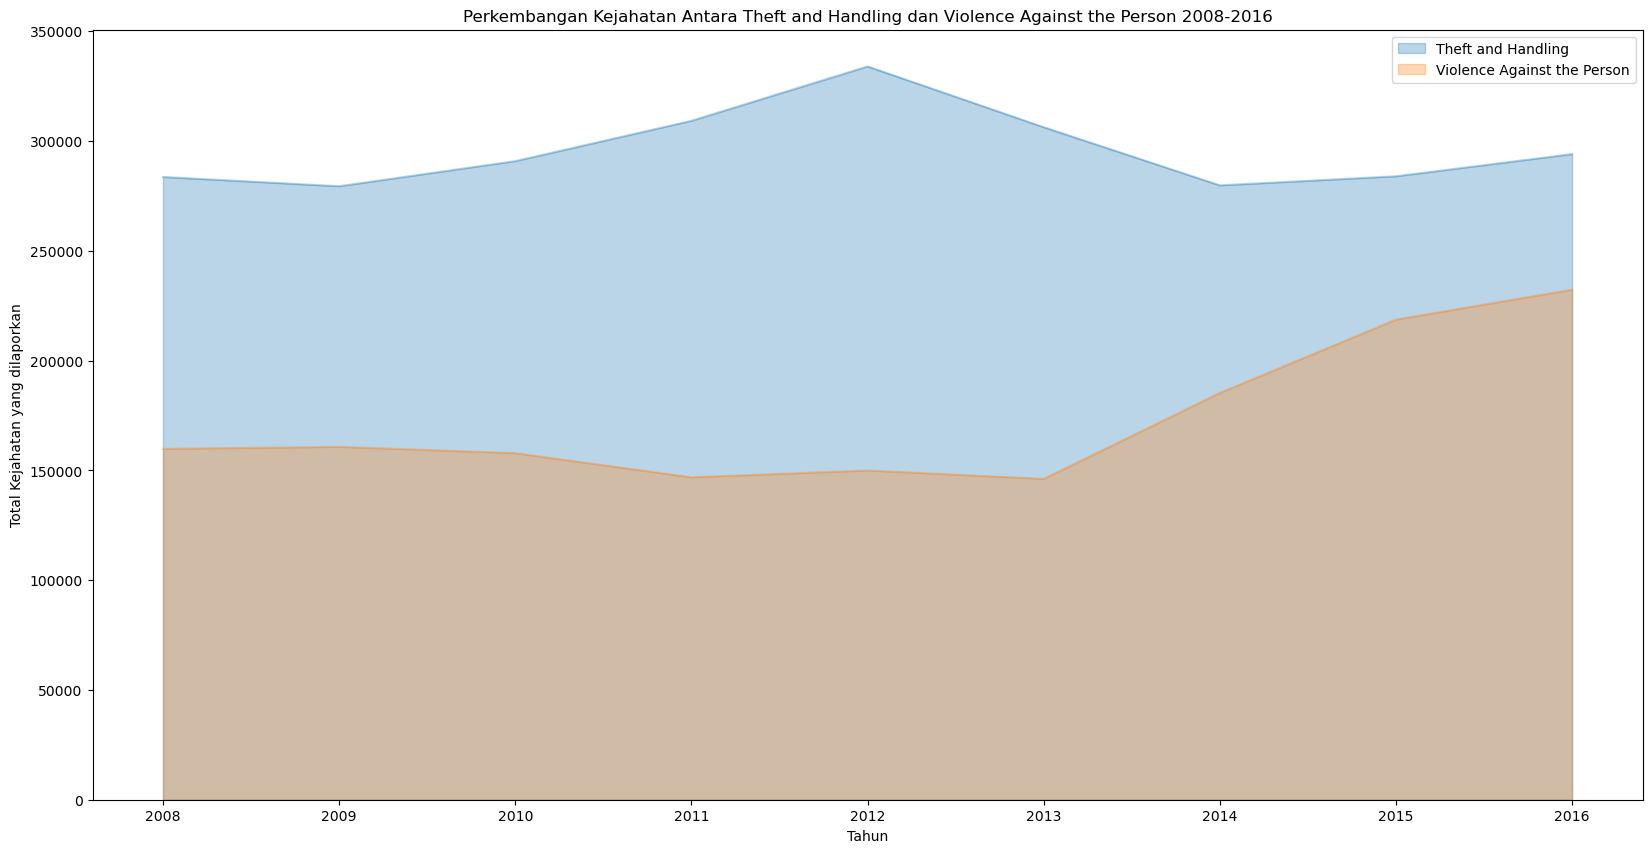

In [22]:
area_plot = df_pivot[['Theft and Handling','Violence Against the Person']]
area_plot.plot(kind='area',
              stacked=False,
               alpha=0.3,
              figsize=(20,10)
              )
plt.title('Perkembangan Kejahatan Antara Theft and Handling dan Violence Against the Person 2008-2016')
plt.xlabel('Tahun')
plt.ylabel("Total Kejahatan yang dilaporkan")

Perkembangan kejahatan pada Theft and Handling mengalami kenaikan paling tinggi pada tahun 2012, sedangkan Violence Against the Person mengalami kenaikan paling tinggi pada tahun 2016

## Line Plot

Selanjutnya mari kita lihat trend perkembangan jenis obat-obatan terlarang dari tahun 2008-2016

In [23]:
df_drugs = df_clean[df_clean['major_category']=='Drugs']
df_aggdrug = df_drugs.groupby(['year'])['value'].sum()
df_aggdrug

year
2008    68804
2009    60549
2010    58674
2011    57550
2012    51776
2013    50278
2014    44435
2015    39785
2016    38914
Name: value, dtype: int64

Text(0, 0.5, 'Tahun')

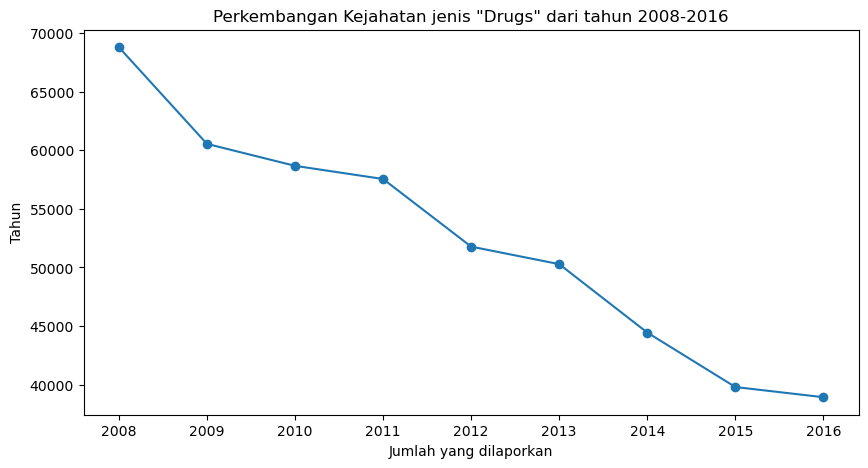

In [24]:
df_aggdrug.plot(kind='line',
               figsize = (10,5),
               marker = 'o')

plt.title('Perkembangan Kejahatan jenis "Drugs" dari tahun 2008-2016')
plt.xlabel('Jumlah yang dilaporkan')
plt.ylabel('Tahun')

Terjadi Penurunan Laporan Kejahatan yang dilaporkan itu artinya sudah semakin berkurang orang yang menggunakan obat obatan terlarang

Lalu kita ingin mengetahui total kejahatan yang dilaporkan orang yang melakukan Criminal Damage

<Axes: xlabel='year'>

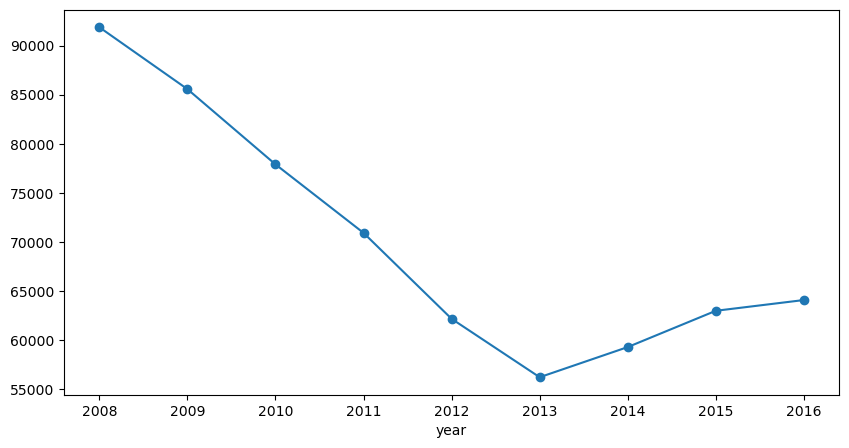

In [25]:
df_pivot['Criminal Damage'].plot(kind='line',
               figsize = (10,5),
               marker = 'o')

Terjadi penurunan pada tahun 2008-2013 dan kenaikan pada tahun 2013-2016

Selanjtunya mari kita mengecek pada bagian Buglary

<Axes: xlabel='year'>

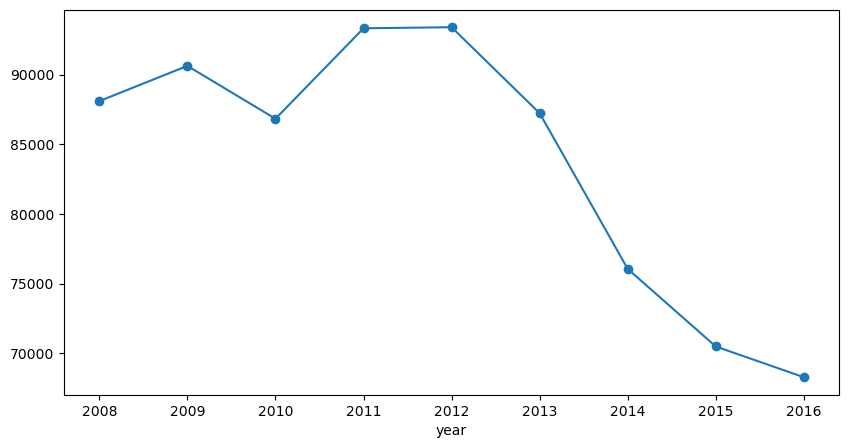

In [26]:
df_pivot['Burglary'].plot(kind='line',
               figsize = (10,5),
               marker = 'o')

Puncaknya terjadi pada tahun 2011-2012, namun terjadi penuruan pada tahun 2013-2016

## Bar Plot

Selanjutnya mari kita buat visualisasi barplot untuk mengetahui jenis kejahatan mana yang paling banyak dilaporkan pada bagian Theft and Handling

Text(0, 0.5, 'Jenis Kejahatan')

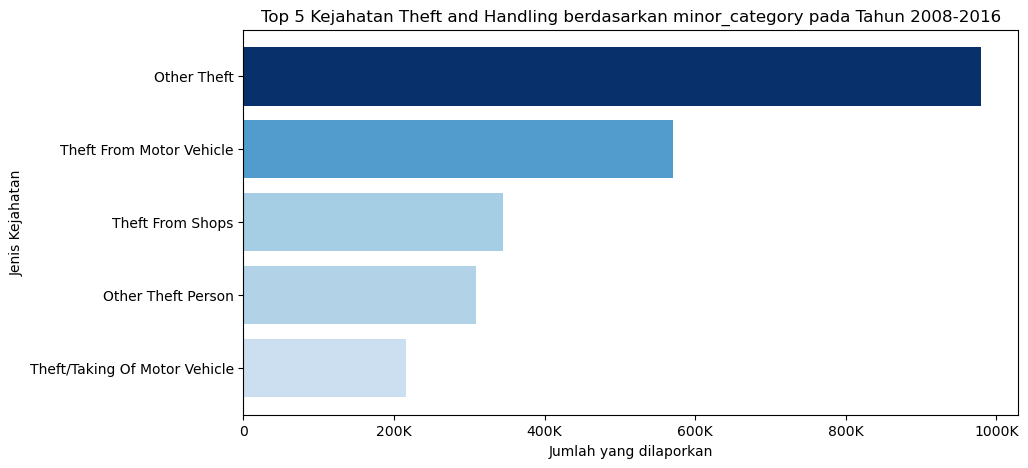

In [27]:
fig, ax = plt.subplots(figsize=(10,5))
cmap = plt.get_cmap('Blues')
df_top5 = df_top5.sort_values('value', ascending=True)
ax.barh(df_top5['minor_category'], df_top5['value'], color=cmap(df_top5['value']/df_top5['value'].max()))

x_ticks = [0,200000,400000, 600000,800000, 1000000]
x_labels = ['0','200K', '400K','600K','800K', '1000K']

plt.gca().set_xticklabels(x_labels)
plt.xticks(x_ticks)


plt.title('Top 5 Kejahatan Theft and Handling berdasarkan minor_category pada Tahun 2008-2016')
plt.xlabel('Jumlah yang dilaporkan')
plt.ylabel('Jenis Kejahatan')

Seperti yang kita ketahui bahwa jenis kejahatan yang sering dilaporkan pada kejahatan Theft and handling adalah Other Theft

## Pie Chart

Setelah itu mari kita melihat persentase kategori kejahatan Drugs pada tahun 2008, mengingat pada tahun 2008 adalah puncak yang sering dilaporkan

In [28]:
df_drugs2 = df_clean[(df_clean['major_category'] == 'Drugs') &(df_clean['year']==2008 )]
df_drugs2.head()
df_aggdrug1 = df_drugs2.groupby(['minor_category'], as_index=False)['value'].sum()
df_aggdrug1 = df_aggdrug1[df_aggdrug1['value'] !=0]
df_aggdrug1.set_index('minor_category', inplace=True)

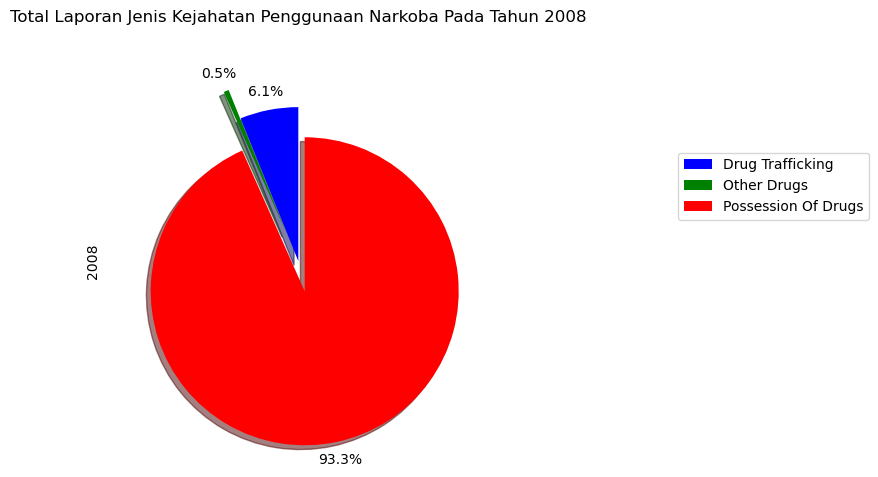

In [29]:
df_aggdrug1
df_aggdrug1['value'].plot(kind='pie',
                         figsize=(12,5),
                         autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,   
                          labels =None,# turn off labels on pie chart
                                # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=['blue','green','red'],  # add custom colors
                            explode=[0,0.2,0.2],
                          pctdistance=1.12
                          # 'explode' lowest 3 continents
                            )
plt.title("Total Laporan Jenis Kejahatan Penggunaan Narkoba Pada Tahun 2008",y=1.1)
plt.ylabel(2008)
plt.legend(labels=df_aggdrug1.index,  loc='upper right', bbox_to_anchor=(2, 0.8))
plt.show()

Berikut Proporsi jenis kejahatan tipe Drugs:
1. Other Drugs sebanyak 0.5%
2. Drug Trafficking sebanyak 6.1%
3. Possesion of Drugs sebanyak 93.3%

## Histogram

In [30]:
df_pivot

,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


Selanjutnya mari kita membuat histogram untuk mengetahui distribusi data

In [31]:
df_pivot.loc[2008,:]

Burglary                        88092
Criminal Damage                 91872
Drugs                           68804
Fraud or Forgery                 5325
Other Notifiable Offences       10112
Robbery                         29627
Sexual Offences                  1273
Theft and Handling             283692
Violence Against the Person    159844
Name: 2008, dtype: int64

Pada kasus kali ini mari kita mencari tahun distribusi data terkait kejatahan yang paling banyak dilaporkan pada tahun 2008

Text(0.5, 0, 'Number of Crime')

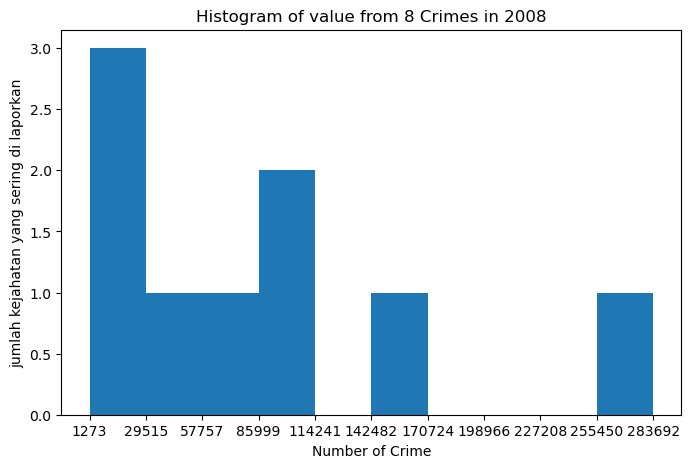

In [32]:
count, bin_edges = np.histogram(df_pivot.loc[2008,:])
df_pivot.loc[2008,:].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)
plt.title('Histogram of value from 8 Crimes in 2008') 
plt.ylabel('jumlah kejahatan yang sering di laporkan') 
plt.xlabel('Number of Crime') 

## Scatter Plot

In [33]:
df_coba = df_clean.groupby(['year'], as_index = False)['value'].sum().sort_values(by = "value", ascending =False)
df_coba = df_coba.sort_values('year')

In [34]:
df_coba

,year,value
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


<Axes: xlabel='year', ylabel='value'>

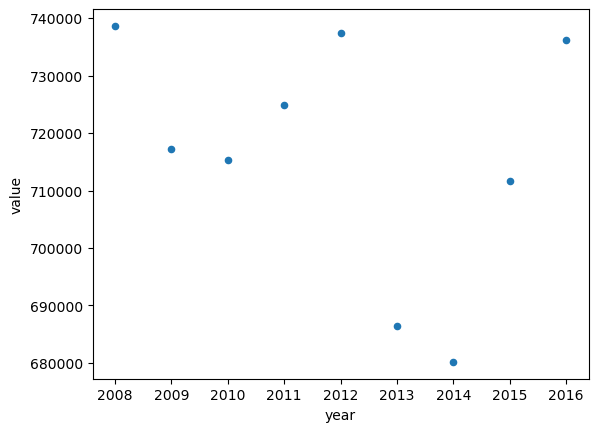

In [35]:
df_coba.plot(kind='scatter', x='year',y='value')

## Boxplot

Selanjutnya kita akan membuat boxplot, pada boxplot ini ktia akan mengetahui gambaran visual tetntang beberapa karakteristik penting pada data.

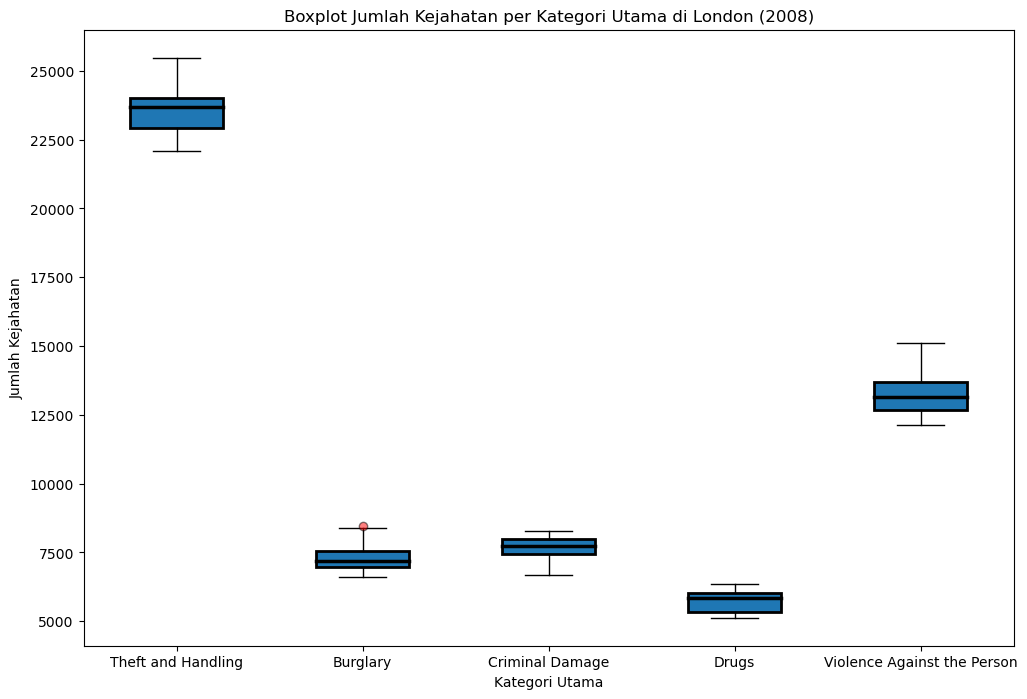

In [36]:
# subset data
categories = ['Theft and Handling','Burglary','Criminal Damage','Drugs','Violence Against the Person']
df_box =  df_mcym[(df_mcym['year']==2008) & (df_mcym['major_category'].isin(categories))]

# buat boxplot horizontal
fig, ax = plt.subplots(figsize=(12, 8))
boxprops = dict(linewidth=2)
flierprops = dict(marker='o', markersize=6, markerfacecolor='red', alpha=0.5)
medianprops = dict(linestyle='-', linewidth=2.5, color='black')

# set warna pada setiap boxplot
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
ax.boxplot([df_box[df_box['major_category'] == 'Theft and Handling']['value'], 
            df_box[df_box['major_category'] == 'Burglary']['value'], 
            df_box[df_box['major_category'] == 'Criminal Damage']['value'], 
            df_box[df_box['major_category'] == 'Drugs']['value'], 
            df_box[df_box['major_category'] == 'Violence Against the Person']['value']],
           labels=['Theft and Handling', 'Burglary', 'Criminal Damage', 'Drugs', 'Violence Against the Person'],
           boxprops=boxprops, flierprops=flierprops, patch_artist=True, medianprops=medianprops)

for patch, color in zip(ax.artists, colors):
    patch.set_facecolor(color)
    
plt.title('Boxplot Jumlah Kejahatan per Kategori Utama di London (2008)')
plt.xlabel('Kategori Utama')
plt.ylabel('Jumlah Kejahatan')
plt.show()


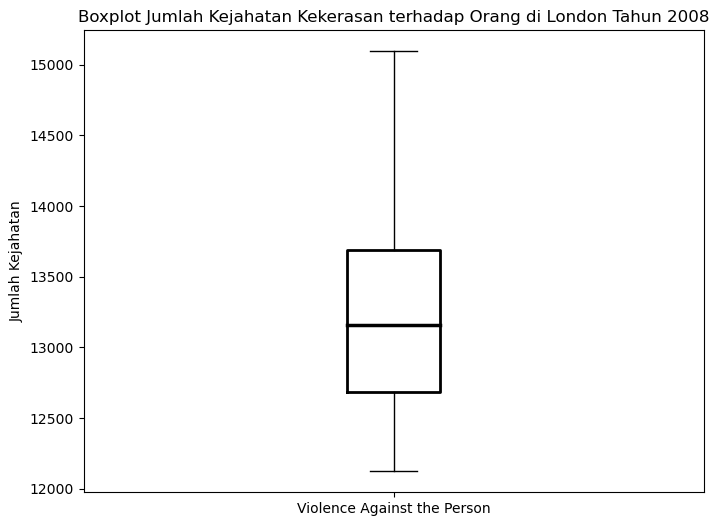

In [37]:
df_vio = df_box[df_box['major_category']=='Violence Against the Person'].sort_values(by = "month", ascending =True)
fig, ax = plt.subplots(figsize=(8, 6))
boxprops = dict(linewidth=2)
flierprops = dict(marker='o', markersize=6, markerfacecolor='red', alpha=0.5)
medianprops = dict(linestyle='-', linewidth=2.5, color='black')
ax.boxplot(df_vio['value'], labels=['Violence Against the Person'], boxprops=boxprops, flierprops=flierprops, medianprops=medianprops)

# tambahkan judul dan label sumbu
plt.title('Boxplot Jumlah Kejahatan Kekerasan terhadap Orang di London Tahun 2008')
plt.ylabel('Jumlah Kejahatan')

plt.show()

# Word Clouds

Selanjutnya mari kita mencari tahu terkait wilayah mana saja yang sering muncul, mari kita gunakan word cloud untuk mengetahui hal tersebut

In [38]:
df_clean

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,Croydon,Robbery,Business Property,0,2011,5


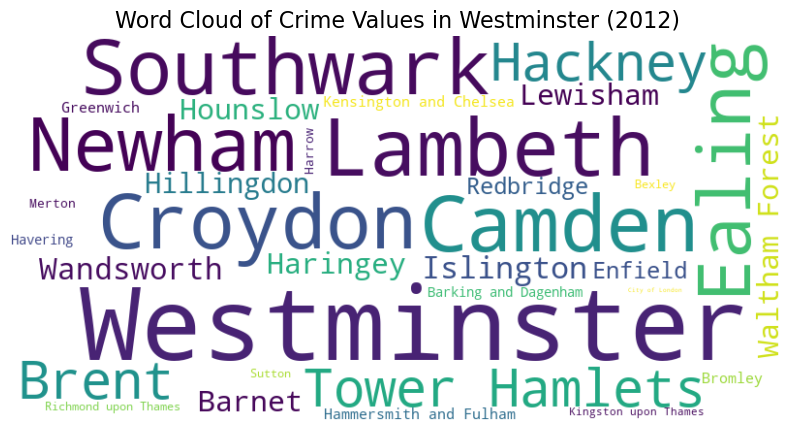

In [39]:

# Filter data
df_west = df_clean[df_clean['year'] == 2012]

# Group by borough and sum the values
df_grouped = df_west.groupby('borough')['value'].sum().reset_index()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(df_grouped['borough'], df_grouped['value'])))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Crime Values in Westminster (2012)', fontsize=16)
plt.show()


Pada tahun 2012, Westminster adalah wilayah yang sering banyak dilaporkan untuk kejahatannya.

# Folium

Untuk Folium tidak bisa dibuat karena tidak terdapat data langitude dan latitude pada kolomnya, oleh karena itu dalam kasus ini kita tidak bisa menampilkanya. Oleh karena itu dibutuhkan data external.

## Kesimpulan

Kesimpulan yang bisa saya tarik dalam kasus ini adalah 
1. Bahwa Kejahatan yang sering dilaporkan pada Tahun 2008-2016 ini adalah Theft & handling sebanyak 2661861 laporan sedangkan paling sedikit adalah Sexual Offence sebanyak 1273
2. Lalu Pada Tahun 2008 adalah tahun yang sering terjadinya kejahatan sebanyak 738641 Kasus
3. Perkembangan kejahatan pada Theft and Handling mengalami kenaikan paling tinggi pada tahun 2012, sedangkan Violence Against the Person mengalami kenaikan paling tinggi pada tahun 2016
4. Kejahatan Tentang Obat-obatan terlarang terjadi penurunan itu artinya sudah semakin berkurang orang yang menggunakan obat obatan terlarang
5. Pada Criminal Damage terjadi penurunan kejahatan pada tahun 2008-2013 dan kenaikan kembali pada tahun 2014-2016
6. Lalu terhadap Buglary puncaknya terjadi pada tahun 2011-2012, namun terjadi penuruan pada tahun 2013-2016
7. Kita sudah mengetahui bahwa Theft & Handling adalah kejahatan yang banyak dilaporkan, jenis kejahatan yang paling sering dilaporkan adalah Other Theft
8. Proporsi jenis kejahatan tipe Drugs:
- Other Drugs sebanyak 0.5%
- Drug Trafficking sebanyak 6.1%
- Possesion of Drugs sebanyak 93.3%
9. Pada tahun 2012, Westminster adalah wilayah yang sering banyak dilaporkan untuk kejahatannya.